# TITANIC SURVIVAL PREDICTION PROJECT

![](https://preview.redd.it/zgu6xooz72a21.jpg?width=560&auto=webp&s=957db3b659f0d781eb3a958b3d0a1561dbd38a40)

This project is for the purpose of submission to the legendary Titanic ML competition on the Kaggle platform.
The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

The data has been split into two groups:

1. training set (train.csv)
2. testing set (test.csv)

# Importing the required libraries:

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Loading the Data Sets:

In [2]:
titanic_train = pd.read_csv("/kaggle/input/titanic/train.csv")
titanic_test = pd.read_csv("/kaggle/input/titanic/test.csv")
titanic_train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Data Set feature description:

PassengerId: An unique index for each passenger. It starts from 1 and increments by 1 for every new passenger.

Survived: Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

Pclass: Ticket class. 
1 stands for First class ticket. 
2 stands for Second class ticket. 
3 stands for Third class ticket. 
It is in a way proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

Name: Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

Sex: Passenger's sex. It's either Male or Female.

Age: Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

SibSp: Number of siblings or spouses travelling with each passenger. 
The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

Parch: Number of parents of children travelling with each passenger.
The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Ticket: Ticket number.

Fare: The amount of money the passenger has paid for the travel journey(in dollars).

Cabin: Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.

Embarked: Port from where the particular passenger was embarked/boarded. Here: C = Cherbourg, Q = Queenstown, S = Southampton

# Data Exploration Analysis:

In [3]:
titanic_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The training-set has 891 examples and 11 features including the target variable ("Survived"). 2 of the features are floats, 5 are integers and 5 are objects.

In [4]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The above function gives us the count, mean and standard deviation for each of the feature variables. We can make the following observations:
* approximately 38% of the passengers on the ship did survive.
* the average Pclass 2.3 indicates that most of the passengers which were onboard were of high economic status
* the age of the passengers varies from 0 to 80, which tells us that passengers of all ages were travelling
* the fare seems to have a high standard deviation, we find that the fare for some passengers is 0, while for some it is as high as above 500 dollars.

We see that 3 of our features could not be displayed in the describe table above, let us try to explore them individually.

In [5]:
print("Cabin:","\n", titanic_train['Cabin'].describe())
print("Sex:","\n",titanic_train['Sex'].describe())
print("Embarked:","\n",titanic_train['Embarked'].describe())

Cabin: 
 count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object
Sex: 
 count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object
Embarked: 
 count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


We find that there are 147 unique cabin values, 3 unique embarked values.
We see that 577 males are onboard and remaining are females.

Let us Check for any missing values in the training data set:

In [6]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We find that, some data values for 3 of the features are missing. We will deal with them in the data preprocessing stage.

# Data Preprocessing:

We see that the age feature has a high standard deviation, hence let us try to find categories in the data so that we can assign appropriate age to each of the missing values in the age column.

The name column suggests that the name prefixes have 4 categories:
1. Miss
2. Master
3. Mrs.
4. Mr.
Let's try and find the average age of each of these categories.

In [7]:
Young_M= titanic_train['Name'].str.contains('Master', regex= True, na=False)
Young_F= titanic_train['Name'].str.contains('Miss', regex= True, na=False)
Adult_M= titanic_train['Name'].str.contains('Mr\.', regex= True, na=False)
Adult_F= titanic_train['Name'].str.contains('Mrs', regex= True, na=False)

print("Mean Age for Young Males: ",titanic_train.loc[Young_M,'Age'].mean())
print("Mean Age for Young Females: ",titanic_train.loc[Young_F,'Age'].mean())
print("Mean Age for Adult Males: ",titanic_train.loc[Adult_M,'Age'].mean())
print("Mean Age for Adult Females: ",titanic_train.loc[Adult_F,'Age'].mean())


Mean Age for Young Males:  4.574166666666667
Mean Age for Young Females:  21.773972602739725
Mean Age for Adult Males:  32.368090452261306
Mean Age for Adult Females:  35.642857142857146


We see that the mean age for different groups is significantly different. Hence, it is appropriate to fill the null values for those passengers using the mean of the corresponding group.
We fill the remaining null values using "bfill" and "ffill" methods, bfill fills the preceding non null value in the same column and ffill replaces the null value with the next non null value in the column.

Note: I have used bfill method first and then ffill just to ensure that for data point having no preceding non-null value, the next non-null value is filled and no data point remains null.

In [8]:
titanic_train.loc[Young_M,'Age'] = titanic_train.loc[Young_M,'Age'].fillna(titanic_train.loc[Young_M,'Age'].mean())
titanic_train.loc[Young_F,'Age'] = titanic_train.loc[Young_F,'Age'].fillna(titanic_train.loc[Young_F,'Age'].mean())
titanic_train.loc[Adult_M,'Age'] = titanic_train.loc[Adult_M,'Age'].fillna(titanic_train.loc[Adult_M,'Age'].mean())
titanic_train.loc[Adult_F,'Age'] = titanic_train.loc[Adult_F,'Age'].fillna(titanic_train.loc[Adult_F,'Age'].mean())

titanic_train=titanic_train.fillna(method="bfill")
titanic_train=titanic_train.fillna(method="ffill")

Let's see if we have any null values remaining in our training data set.

In [9]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S


Voila! No null values remain. 
Let us follow the same procedure for the testing data set:

In [11]:
Young_M= titanic_test['Name'].str.contains('Master', regex= True, na=False)
Young_F= titanic_test['Name'].str.contains('Miss', regex= True, na=False)
Adult_M= titanic_test['Name'].str.contains('Mr\.', regex= True, na=False)
Adult_F= titanic_test['Name'].str.contains('Mrs', regex= True, na=False)

print("Mean Age for Young Males: ",titanic_test.loc[Young_M,'Age'].mean())
print("Mean Age for Young Females: ",titanic_test.loc[Young_F,'Age'].mean())
print("Mean Age for Adult Males: ",titanic_test.loc[Adult_M,'Age'].mean())
print("Mean Age for Adult Females: ",titanic_test.loc[Adult_F,'Age'].mean())

titanic_test.loc[Young_M,'Age'] = titanic_test.loc[Young_M,'Age'].fillna(titanic_test.loc[Young_M,'Age'].mean())
titanic_test.loc[Young_F,'Age'] = titanic_test.loc[Young_F,'Age'].fillna(titanic_test.loc[Young_F,'Age'].mean())
titanic_test.loc[Adult_M,'Age'] = titanic_test.loc[Adult_M,'Age'].fillna(titanic_test.loc[Adult_M,'Age'].mean())
titanic_test.loc[Adult_F,'Age'] = titanic_test.loc[Adult_F,'Age'].fillna(titanic_test.loc[Adult_F,'Age'].mean())

titanic_test=titanic_test.fillna(method="bfill")
titanic_test=titanic_test.fillna(method="ffill")

titanic_test.head()

Mean Age for Young Males:  7.406470588235294
Mean Age for Young Females:  21.774843750000002
Mean Age for Adult Males:  32.0
Mean Age for Adult Females:  38.903225806451616


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B45,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B45,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B45,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B45,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B45,S


In [12]:
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Let's explore our data further:

In [13]:
titanic_train['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

We see that the training data set has 342 survivors and 549 fatalities.

Let's see gender wise survival rate:

In [14]:
females = titanic_train.loc[titanic_train.Sex == 'female']["Survived"]
survived_F = sum(females)/len(females)
survived_F


0.7420382165605095

In [15]:
males = titanic_train.loc[titanic_train.Sex == 'male']["Survived"]
survived_M = sum(males)/len(males)
survived_M

0.18890814558058924

So we see that 74% of the women have survived, and only 19% of the males have survived, the difference is quite huge.

# Data Vizualization:

Survival numbers for males and females:

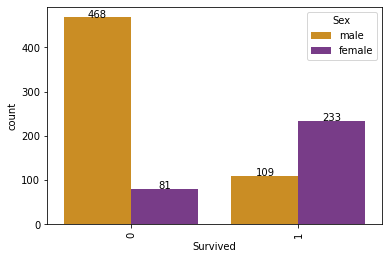

In [16]:
sur_sex = sns.countplot(x='Survived',hue='Sex',data=titanic_train,palette='CMRmap_r')
sur_sex.set_xticklabels(sur_sex.get_xticklabels(),rotation=90)
for p in sur_sex.patches:
    height = p.get_height()
    sur_sex.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
sns.set(rc={'figure.figsize':(8,6)})

The numbers confirm the survival rates calculated above.

Survival numbers for each of the 3 passenger classes:

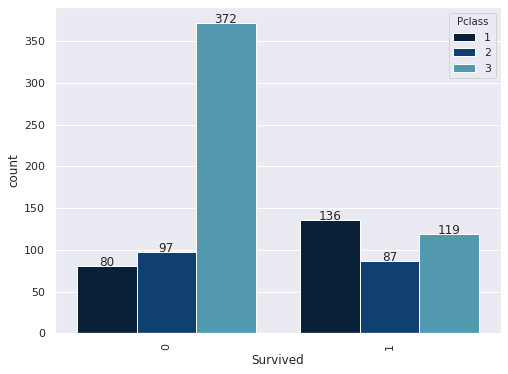

In [17]:
sur_pclass = sns.countplot(x='Survived',hue='Pclass',data=titanic_train,palette='ocean')
sur_pclass.set_xticklabels(sur_pclass.get_xticklabels(),rotation=90)
for p in sur_pclass.patches:
    height = p.get_height()
    sur_pclass.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
sns.set(rc={'figure.figsize':(8,6)})

It can be seen that passengers travelling in third class, lower income status have experiend the most fatalities, followed by the second class and the first class or the rich passengers. It is not surprising, you see money matters everywhere *****sighs*****

Let us survival numbers based on the place where the passengers embarked:

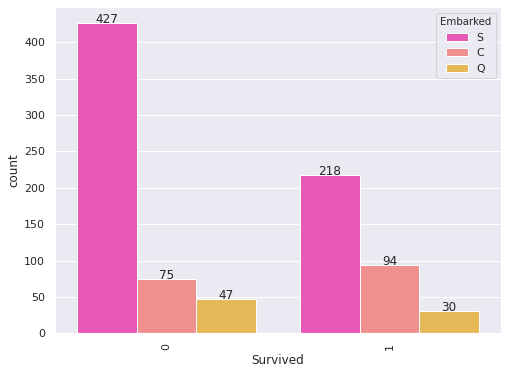

In [18]:
sur_embarked = sns.countplot(x='Survived',hue='Embarked',data=titanic_train,palette='spring')
sur_embarked.set_xticklabels(sur_embarked.get_xticklabels(),rotation=90)
for p in sur_embarked.patches:
    height = p.get_height()
    sur_embarked.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
sns.set(rc={'figure.figsize':(10,6)})

Here we can see that, the highest number of passenger embarked from Southampton, and have suffered a high rate of 66% fatalities. 44% of those embarked from Cherbourg did not survive and 61% of those embarked from Queensland died.

We can define a new feature family using the Sibling and the Parents feature data as follows: 

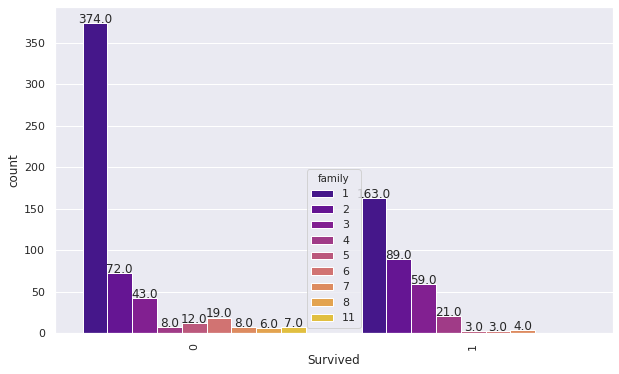

In [19]:
titanic_train['family'] = titanic_train['SibSp'] + titanic_train['Parch'] + 1
sur_embarked = sns.countplot(x='Survived',hue='family',data=titanic_train,palette='plasma')
sur_embarked.set_xticklabels(sur_embarked.get_xticklabels(),rotation=90)
for p in sur_embarked.patches:
    height = p.get_height()
    sur_embarked.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
sns.set(rc={'figure.figsize':(12,12)})

We see that approximately 60% of the passengers were travelling alone and 70% of them died, which is huge! It also suggests that families of size as high as 11 were onboard.

Let us vizualize survival rate as per the variation in fare prices the passengers paid:

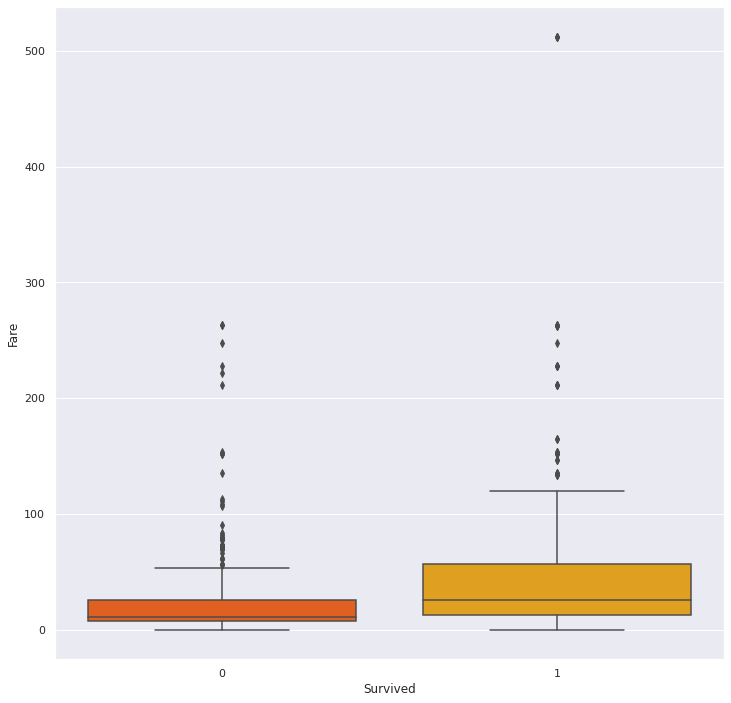

In [20]:
sns.boxplot(x='Survived', y='Fare', data=titanic_train, palette='autumn' )
sns.set(rc={'figure.figsize':(12,12)})

It seems that those who survived are the ones who has bought higher priced tickets on average as compared to those who did not survive. This aligns with our inference regarding the survival numbers for different passenger classes.

Let us now vizualize the survival numbers for passengers as per their age:

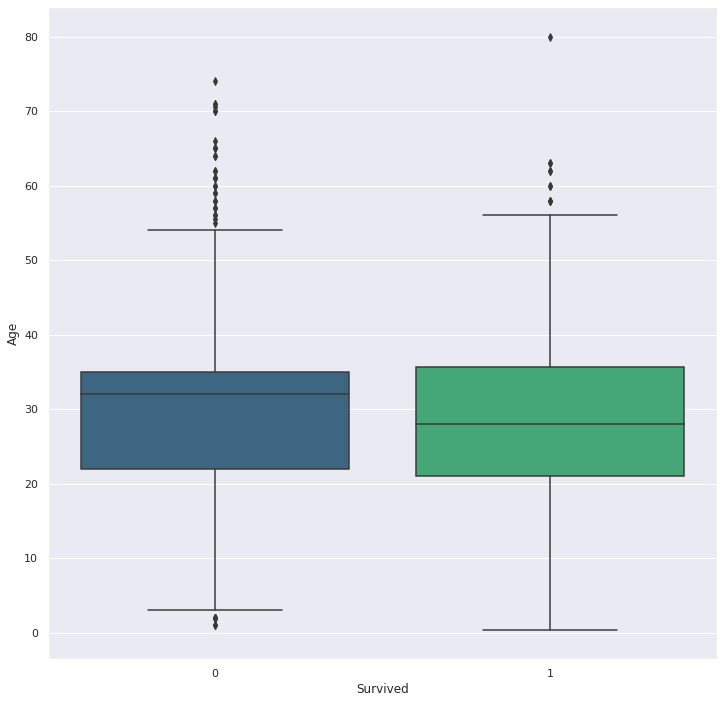

In [21]:
sns.boxplot(x='Survived', y='Age', data=titanic_train, palette='viridis' )
sns.set(rc={'figure.figsize':(10,10)})

It can be seen that the death rate is higher for the higher age passengers on an average.

# Correlation Plot:

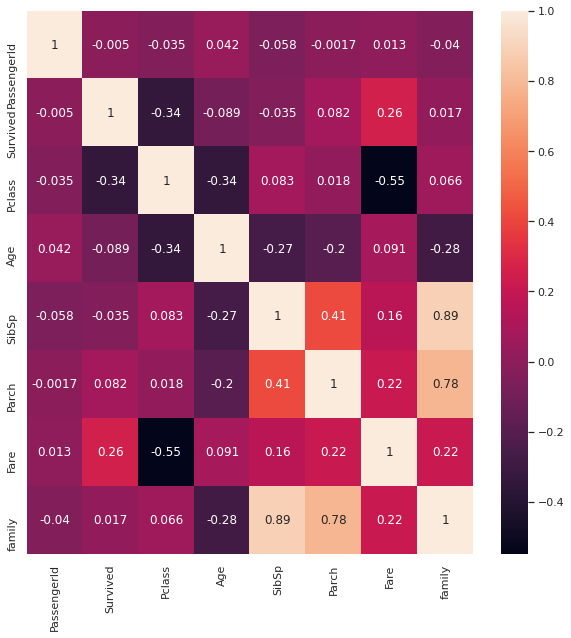

In [22]:
corr = titanic_train.corr()
sns.heatmap(corr, annot=True)

Observations:
* "Survived" is inversely correlated with the passenger class, as seen in the data vizualization as well
* "Survived" is very slightly and inversely correlated with age of the passengers
* Passenger class is inversely correlated with fare, which is obvious

# Modeling the data:

Two of our features "Sex" and "Embarked" are categorical and have the data type as object, we need to encode it to numbers so that they can be used in the machine learning algorithms below.

Training data:
* X_train: The independent feature set
* Y_train: The dependent variable

In [23]:
from sklearn.preprocessing import OneHotEncoder
X_train = titanic_train[['Pclass','Age','SibSp','Parch','Fare']]
X_train = pd.concat([X_train,pd.get_dummies(titanic_train[['Sex','Embarked']])], axis=1)
print(X_train.head())
Y_train= titanic_train['Survived']


   Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3  22.0      1      0   7.2500           0         1           0   
1       1  38.0      1      0  71.2833           1         0           1   
2       3  26.0      0      0   7.9250           1         0           0   
3       1  35.0      1      0  53.1000           1         0           0   
4       3  35.0      0      0   8.0500           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  


Testing data:
* X_test: The independent feature set
* Y_test: The target variable to be predicted

In [24]:
from sklearn.preprocessing import OneHotEncoder
X_test = titanic_test[['Pclass','Age','SibSp','Parch','Fare']]
X_test = pd.concat([X_test,pd.get_dummies(titanic_test[['Sex','Embarked']])], axis=1)
print(X_test.head())



   Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3  34.5      0      0   7.8292           0         1           0   
1       3  47.0      1      0   7.0000           1         0           0   
2       2  62.0      0      0   9.6875           0         1           0   
3       3  27.0      0      0   8.6625           0         1           0   
4       3  22.0      1      1  12.2875           1         0           0   

   Embarked_Q  Embarked_S  
0           1           0  
1           0           1  
2           1           0  
3           0           1  
4           0           1  


# Logistic Regression Model:

In [25]:
LR_survived = LogisticRegression(solver='lbfgs',max_iter=10000)
LR_survived.fit(X_train, Y_train)
LR_pred = LR_survived.predict(X_test)
LR_Accuracy = "{:.2f} %".format(LR_survived.score(X_train,Y_train)*100)
print("Accuracy",LR_Accuracy)

Accuracy 80.25 %


# Support Vector Classifier:

In [26]:
SVC_survived = SVC()
SVC_survived.fit(X_train, Y_train)
SVC_pred = SVC_survived.predict(X_test)
SVC_Accuracy = "{:.2f} %".format(SVC_survived.score(X_train,Y_train)*100)
print("Accuracy",SVC_Accuracy)

Accuracy 68.35 %


# K Nearest Neighbour Algorithm:

In [27]:
KNN_survived = KNeighborsClassifier(n_neighbors = 3)
KNN_survived.fit(X_train, Y_train)
KNN_pred = KNN_survived.predict(X_test)
KNN_Accuracy = "{:.2f} %".format(KNN_survived.score(X_train,Y_train)*100)
print("Accuracy",KNN_Accuracy)

Accuracy 83.73 %


# Gaussian Naive Bayes:

In [28]:
NB_survived = GaussianNB()
NB_survived.fit(X_train, Y_train)
NB_pred = NB_survived.predict(X_test)
NB_Accuracy = "{:.2f} %".format(NB_survived.score(X_train,Y_train)*100)
print("Accuracy",NB_Accuracy)

Accuracy 79.12 %


# Decision Tree:

In [29]:
DT_survived = DecisionTreeClassifier()
DT_survived.fit(X_train, Y_train)
DT_pred = DT_survived.predict(X_test)
DT_Accuracy = "{:.2f} %".format(DT_survived.score(X_train,Y_train)*100)
print("Accuracy",DT_Accuracy)

Accuracy 98.20 %


# Random Forest:

In [30]:
RF_survived = RandomForestClassifier(n_estimators=10)
RF_survived.fit(X_train, Y_train)
RF_pred = RF_survived.predict(X_test)
RF_Accuracy = "{:.2f} %".format(RF_survived.score(X_train,Y_train)*100)
print("Accuracy",RF_Accuracy)

Accuracy 96.86 %


# X- Gradient Booster:

In [31]:
XGB_survived = XGBClassifier()
XGB_survived.fit(X_train,Y_train)
XGB_pred = XGB_survived.predict(X_test)
XGB_Accuracy = "{:.2f} %".format(XGB_survived.score(X_train,Y_train)*100)
print("Accuracy: ",XGB_Accuracy)

Accuracy:  96.41 %


Let us table our model accuracies:

In [32]:
Models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'KNN', 'Gaussian Naive Bayes','Decision Tree','Random Forest','XGBClassifier'],
    'Score': [LR_Accuracy,SVC_Accuracy, KNN_Accuracy, NB_Accuracy,DT_Accuracy, RF_Accuracy, XGB_Accuracy]})
Models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,98.20 %
5,Random Forest,96.86 %
6,XGBClassifier,96.41 %
2,KNN,83.73 %
0,Logistic Regression,80.25 %
3,Gaussian Naive Bayes,79.12 %
1,Support Vector Machines,68.35 %


# Output files for each Model:

In [33]:
# submission file from each model
SVC_file = pd.DataFrame({"PassengerId": titanic_test["PassengerId"], "Survived": SVC_pred})
SVC_file.to_csv('SVC_file.csv', index=False)

LR_file = pd.DataFrame({"PassengerId": titanic_test["PassengerId"], "Survived": LR_pred})
LR_file.to_csv('LR_file.csv', index=False)

KNN_file = pd.DataFrame({"PassengerId": titanic_test["PassengerId"], "Survived": KNN_pred})
KNN_file.to_csv('KNN_file.csv', index=False)

NB_file = pd.DataFrame({"PassengerId": titanic_test["PassengerId"], "Survived": NB_pred})
NB_file.to_csv('NB_file.csv', index=False)

DT_file = pd.DataFrame({"PassengerId": titanic_test["PassengerId"], "Survived": DT_pred})
DT_file.to_csv('DT_file.csv', index=False)

RF_file = pd.DataFrame({"PassengerId": titanic_test["PassengerId"], "Survived": RF_pred})
RF_file.to_csv('RF_file.csv', index=False)

XGB_file = pd.DataFrame({"PassengerId": titanic_test["PassengerId"], "Survived": XGB_pred})
XGB_file.to_csv('XGB_file.csv', index=False)

The highest model accuracy for the testing data was achieved with the Logistic Regression Model, it predicted the survival numbers for the testing set with a score of 78%.